# Tarefa 2 - Heart Attack Risk Prediction

### O Dataset
O Dataset <em>heart_attack_prediction_dataset.csv</em> tem como objetivo explorar as dinâmicas que influenciam a saúde do coração e os fatores que o preditam. 

Este dataset é constituído pelos seguintes parâmetros:

- **Patient ID** - Identificador único para cada paciente;

- **Age** - Idade do paciente;
- **Sex** - Género do paciente (Male/Female);
- **Cholesterol** - Níveis de colesterol do paciente;
- **Blood Pressure** - Pressão sanguínea do paciente (systolic/diastolic);
- **Heart Rate** - Frequência cardíaca do paciente;
- **Diabetes** - Se o paciente tem diabetes (Yes/No);
- **Family History** - Histórico familiar de doenças cardíacas (1: Sim, 0: Não);
- **Smoking** - Estado de fumador do paciente (1: Fumador, 0: Não Fumador);
- **Obesity** - Estado de obesidade do paciente (1: Obeso, 0: Não obeso);
- **Alcohol Consumption** - Se o paciente consome álcool (1: Sim, 0: Não);
- **Exercise Hours Per Week** - Número de horas de exercício por semana;
- **Diet** - Hábitos de alimentação do paciente (Healthy/Average/Unhealthy);
- **Previous Heart Problems** - Existência de histórico de problemas cardíacos (1: Sim, 0: Não);
- **Medication Use** - Uso de medicação por parte do paciente (1: Sim, 0: Não);
- **Stress Level** - Níveis de stress reportados pelo paciente (1-10);
- **Sedentary Hours Per Day** - Horas de atividade sedentária por dia;
- **Income** - Nível de rendimento do paciente;
- **BMI** - Índice de massa corporal do paciente;
- **Triglycerides** - Níveis de triglicerídeos do paciente;
- **Physical Activity Days Per Week** - Dias de atividade física por semana;
- **Sleep Hours Per Day** - Horas de sono por dia;
- **Country** - País do paciente;
- **Continent** - Continente onde o paciente reside;
- **Hemisphere** - Hemisfério onde o paciente reside;
- **Heart Attack Risk** - Presença de risco de ataque cardíaco (1 : Sim, 0: Não);

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

Iniciamos o estudo do dataset pelo load dos dados numa dataframe panda.

In [2]:
data = pd.read_csv('heart_attack_prediction_dataset.csv')

Imprimimos as primeiras linhas do dataframe.

In [3]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Em seguida, geramos as estatísticas descritivas:

In [4]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


De forma a obtermos um resumo da informação (número de valores não nulos em cada coluna, o tipo de dados de cada coluna e o uso de memória) contida no Dataframe:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

Verificamos se existem valores duplicados:

In [6]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]


## Data Treatment

Remoção do atributo **Patient ID** por ser um atributo único em todos os registos.

In [7]:
data.drop(columns=['Patient ID'], inplace=True)

#### Label encoding do atributo **sex**

0 - Female

1 - Male

In [8]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
data['Sex'] = lb.fit_transform(data['Sex'])

data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,1,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,0,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,1,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,1,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


#### Diet Treatment

0 - Unhealthy

1 - Average

2 - Healthy

In [9]:
print(data['Diet'].head())
replace_map = {'Diet': {'Unhealthy': 0, 'Average': 1, 'Healthy': 2}}
predefined_order = ['Unhealthy', 'Average', 'Healthy']

labels = data['Diet'].astype('category').cat.categories.tolist()
labels = sorted(labels, key=lambda x: predefined_order.index(x))

replace_map_comp = {'Diet' : {k: v for k,v in zip(labels,list(range(len(labels))))}} 

data.replace(replace_map_comp, inplace=True)
data['Diet'].head()

0      Average
1    Unhealthy
2      Healthy
3      Average
4    Unhealthy
Name: Diet, dtype: object


0    1
1    0
2    2
3    1
4    0
Name: Diet, dtype: int64

#### Blood Presure Treatment

In [10]:
systolic = []
diastolic = []

for bp in data['Blood Pressure']:
    systolic.append(int(bp.split('/')[0]))
    diastolic.append(int(bp.split('/')[1]))

data.drop(columns=['Blood Pressure'], inplace=True)

data['Blood Pressure Systolic'] = systolic
data['Blood Pressure Diastolic'] = diastolic

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int32  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

#### Country, Continent and Hemisphere Treatment

In [11]:
data['Country'] = lb.fit_transform(data['Country'])
data['Continent'] = lb.fit_transform(data['Continent'])
data['Hemisphere'] = lb.fit_transform(data['Hemisphere'])


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int32  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

## Modeling

### Normalize and Split Features

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[data.drop(columns=['Heart Attack Risk']).columns]
y = data['Heart Attack Risk']

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023, stratify=y)


### Prepare Metrics and Model Selection

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Árvore de decisão

#### Hold-out Validation

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1406
           1       0.34      0.35      0.35       785

    accuracy                           0.52      2191
   macro avg       0.48      0.48      0.48      2191
weighted avg       0.53      0.52      0.52      2191



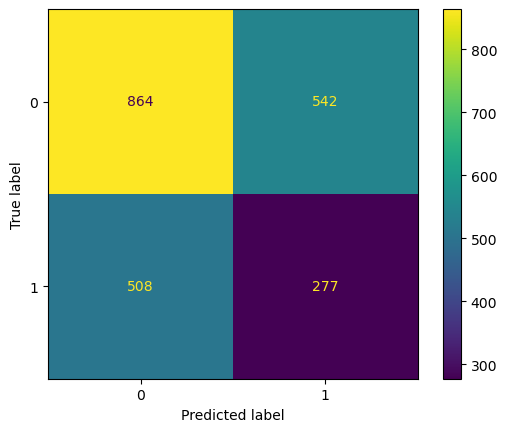

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=2023)
dtc.fit(X_train, y_train)
predictionDTC = dtc.predict(X_test)


print(classification_report(y_test, predictionDTC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionDTC)
plt.show()

#### Cross Validation

In [15]:
scores = cross_val_score(dtc, X, y, cv=10)
scores

array([0.54389966, 0.52109464, 0.5313569 , 0.5913242 , 0.52054795,
       0.55365297, 0.50799087, 0.55365297, 0.51027397, 0.54794521])

#### GridSearch

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.363 total time=   0.0s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.384 total time=   0.0s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.370 total time=   0.0s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.376 total time=   0.0s
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.352 total time=   0.0s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.389 total time=   0.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.365 total time=   0.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.377 total time=   0.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=0.384 total time=   0.0s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.418 total time=   0.0s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.346 total time=   0.0s
[CV 2/5] END ..criterion=entropy, splitter=best;,

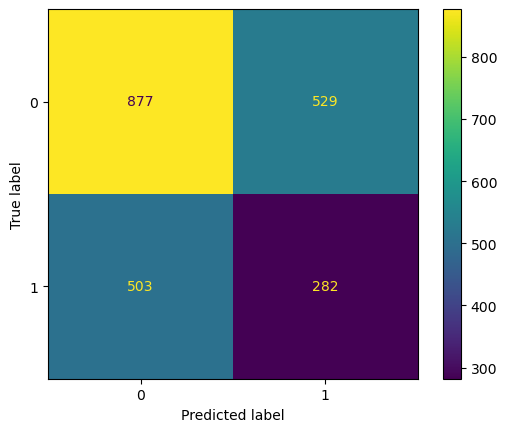

In [16]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

scoring = 'recall'

grid_searchDTC = GridSearchCV(dtc, param_grid, cv=5, refit=True, verbose=3, scoring=scoring)
grid_searchDTC.fit(X_train, y_train)
grid_predictionDTC = grid_searchDTC.predict(X_test)


print("Best estimator: ", grid_searchDTC.best_estimator_)


print(classification_report(y_test, grid_predictionDTC))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionDTC)
plt.show()

### Regressão Linear

#### Hold-out Validation

In [17]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=2023)

dtr.fit(X_train, y_train)
predictionDTR = dtr.predict(X_test)

Mean Absolute Error: 0.478776814240073

Mean Squared Error: 0.478776814240073

Root Mean Squared Error: 0.6919370016410981
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1406
           1       0.34      0.35      0.35       785

    accuracy                           0.52      2191
   macro avg       0.48      0.48      0.48      2191
weighted avg       0.53      0.52      0.52      2191



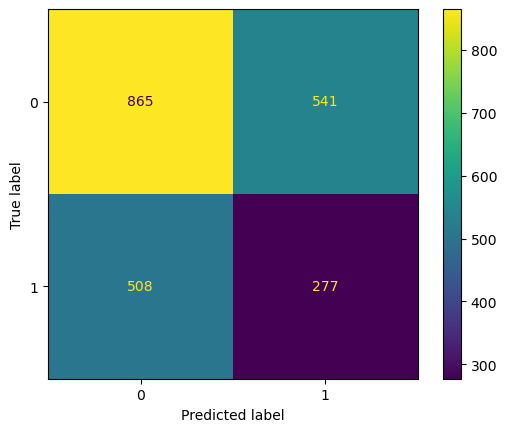

In [18]:
print('Mean Absolute Error: ',end='')
print(mean_absolute_error(y_test, predictionDTR))

print('\nMean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=True))

print('\nRoot Mean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=False))


print(classification_report(y_test, predictionDTR))
ConfusionMatrixDisplay.from_predictions(y_test, predictionDTR)
plt.show()

#### Cross Validation

In [19]:
scores = cross_val_score(dtr, X, y, cv=10)
scores

array([-1.08134876, -0.98504084, -0.92141082, -1.16121335, -1.0234143 ,
       -1.0953531 , -1.01827477, -0.89742063, -1.06546743, -1.11395833])

#### GridSearch

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END criterion=squared_error, splitter=best;, score=0.381 total time=   0.0s
[CV 2/5] END criterion=squared_error, splitter=best;, score=0.379 total time=   0.0s
[CV 3/5] END criterion=squared_error, splitter=best;, score=0.375 total time=   0.0s
[CV 4/5] END criterion=squared_error, splitter=best;, score=0.366 total time=   0.0s
[CV 5/5] END criterion=squared_error, splitter=best;, score=0.373 total time=   0.0s
[CV 1/5] END criterion=squared_error, splitter=random;, score=0.383 total time=   0.0s
[CV 2/5] END criterion=squared_error, splitter=random;, score=0.377 total time=   0.0s
[CV 3/5] END criterion=squared_error, splitter=random;, score=0.382 total time=   0.0s
[CV 4/5] END criterion=squared_error, splitter=random;, score=0.377 total time=   0.0s
[CV 5/5] END criterion=squared_error, splitter=random;, score=0.416 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, splitter=best;, score=0.381 total time=   0

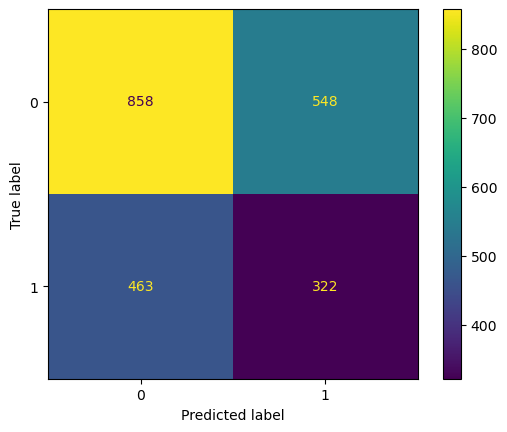

In [20]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random']
}

scoring = 'recall'

grid_searchDTR = GridSearchCV(dtr, param_grid, cv=5, refit=True, verbose=3, scoring=scoring)
grid_searchDTR.fit(X_train, y_train)
grid_predictionDTR = grid_searchDTR.predict(X_test)


print("Best estimator: ", grid_searchDTR.best_estimator_)


print(classification_report(y_test, grid_predictionDTR))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionDTR)
plt.show()

### Support Vector Classifier

#### Hold-out Validation

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1406
           1       0.00      0.00      0.00       785

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191



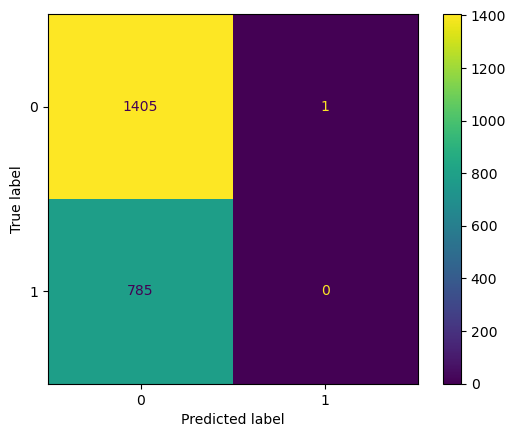

In [21]:
from sklearn.svm import SVC

svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
predictionSVC = svc.predict(X_test)

print(classification_report(y_test, predictionSVC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionSVC)
plt.show()

#### Cross Validation

In [22]:
scores = cross_val_score(svc, X, y, cv=10)
scores

array([0.64196123, 0.64196123, 0.64196123, 0.64269406, 0.64155251,
       0.64155251, 0.64041096, 0.63926941, 0.64155251, 0.64155251])

#### GridSearch

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.381 total time=   3.8s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.409 total time=   3.6s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.409 total time=   4.0s
[CV 1/3] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.171 total time=   0.5s
[CV 2/3] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.189 total time=   0.5s
[CV 3/3] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.198 total time=   0.5s
[CV 1/3] END .........C=1, gamma=1, kernel=poly;, score=0.381 total time=   3.6s
[CV 2/3] END .........C=1, gamma=1, kernel=poly;, score=0.409 total time=   3.7s
[CV 3/3] END .........C=1, gamma=1, kernel=poly;, score=0.409 total time=   4.1s
[CV 1/3] END .......C=1, gamma=0.1, kernel=poly;, score=0.350 total time=   1.1s
[CV 2/3] END .......C=1, gamma=0.1, kernel=poly;, score=0.352 total time=   1.1s
[CV 3/3] END .......C=1, gamma=0.1, kernel=poly;,

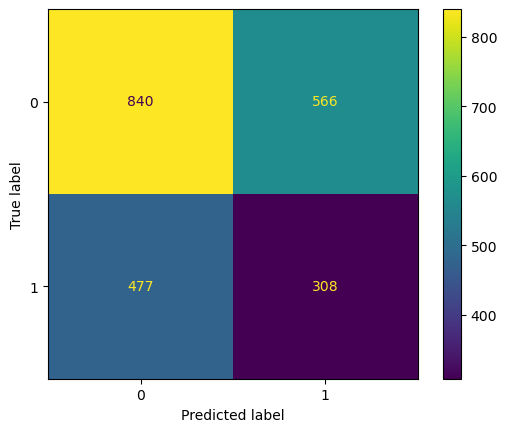

In [23]:
param_grid = {
    'C': [0.1, 1], 
    'gamma': [1, 0.1],
    'kernel': ['poly']
}

scoring = 'recall'

grid_searchSVC = GridSearchCV(svc, param_grid, cv=3, refit=True, verbose=3, scoring=scoring)
grid_searchSVC.fit(X_train, y_train)
grid_predictionSVC = grid_searchSVC.predict(X_test)


print("Best estimator: ", grid_searchSVC.best_estimator_)


print(classification_report(y_test, grid_predictionSVC))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionSVC)
plt.show()

### Support Vector Regressor

#### Hold-out Validation

Mean Absolute Error: 0.4412397567674806

Mean Squared Error: 0.27775786300506505

Root Mean Squared Error: 0.5270273835438393
              precision    recall  f1-score   support

           0       0.64      0.90      0.75      1406
           1       0.33      0.09      0.15       785

    accuracy                           0.61      2191
   macro avg       0.49      0.49      0.45      2191
weighted avg       0.53      0.61      0.53      2191



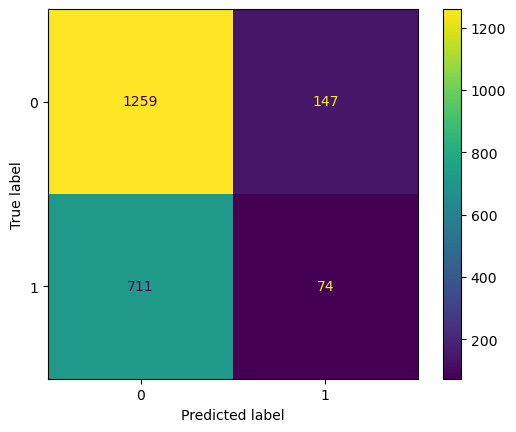

In [24]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
predictionSVR = svr.predict(X_test)

print('Mean Absolute Error: ',end='')
print(mean_absolute_error(y_test, predictionSVR))

print('\nMean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionSVR, squared=True))

print('\nRoot Mean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionSVR, squared=False))


predictionSVR = list(map(round,predictionSVR))
print(classification_report(y_test, predictionSVR))
ConfusionMatrixDisplay.from_predictions(y_test, predictionSVR)
plt.show()

#### Cross Validation

In [25]:
scores = cross_val_score(svr, X, y, cv=10)
scores

array([-0.16779187, -0.22239082, -0.22277008, -0.20056194, -0.24859848,
       -0.20779454, -0.20251736, -0.25438143, -0.19847257, -0.16990367])

#### GridSearch

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.381 total time=   3.7s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.409 total time=   3.7s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.409 total time=   3.9s
[CV 1/3] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.171 total time=   0.5s
[CV 2/3] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.189 total time=   0.5s
[CV 3/3] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.198 total time=   0.5s
[CV 1/3] END .........C=1, gamma=1, kernel=poly;, score=0.381 total time=   3.5s
[CV 2/3] END .........C=1, gamma=1, kernel=poly;, score=0.409 total time=   3.5s
[CV 3/3] END .........C=1, gamma=1, kernel=poly;, score=0.409 total time=   3.9s
[CV 1/3] END .......C=1, gamma=0.1, kernel=poly;, score=0.350 total time=   1.1s
[CV 2/3] END .......C=1, gamma=0.1, kernel=poly;, score=0.352 total time=   1.1s
[CV 3/3] END .......C=1, gamma=0.1, kernel=poly;,

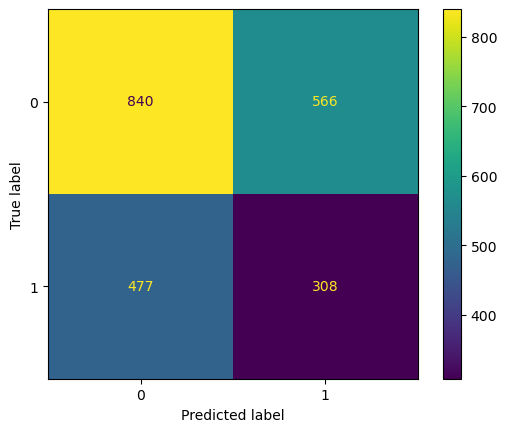

In [26]:
param_grid = {
    'C': [0.1, 1], 
    'gamma': [1, 0.1],
    'kernel': ['poly'],
}

scoring = 'recall'

grid_searchSVR = GridSearchCV(svc, param_grid, cv=3, refit=True, verbose=3, scoring=scoring)
grid_searchSVR.fit(X_train, y_train)
grid_predictionSVR = grid_searchSVR.predict(X_test)


print("Best estimator: ", grid_searchSVR.best_estimator_)


grid_predictionSVR = list(map(round,grid_predictionSVR))
print(classification_report(y_test, grid_predictionSVR))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionSVR)
plt.show()

### Gradient Boosting Machines

#### Hold-out Validation

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1406
           1       0.50      0.02      0.04       785

    accuracy                           0.64      2191
   macro avg       0.57      0.50      0.41      2191
weighted avg       0.59      0.64      0.51      2191



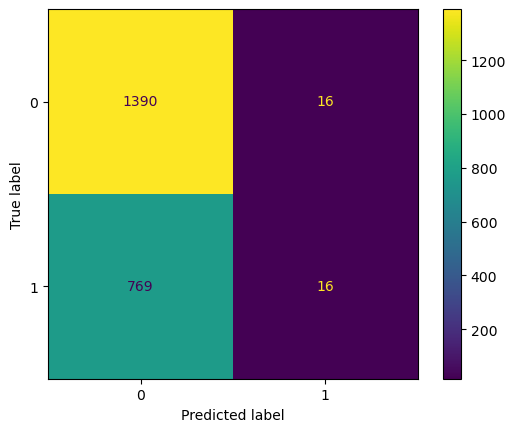

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=2023)
gbm.fit(X_train, y_train)
predictionGBM = gbm.predict(X_test)

print(classification_report(y_test, predictionGBM))
ConfusionMatrixDisplay.from_predictions(y_test, predictionGBM)
plt.show()

#### Cross Validation

In [28]:
scores = cross_val_score(gbm, X, y, cv=10)
scores

array([0.63968073, 0.63169897, 0.63854048, 0.63242009, 0.64497717,
       0.63812785, 0.63926941, 0.63812785, 0.63584475, 0.63926941])

#### Grid Search

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END learning_rate=2, max_depth=4, n_estimators=100;, score=0.405 total time=   1.8s
[CV 2/3] END learning_rate=2, max_depth=4, n_estimators=100;, score=0.615 total time=   1.8s
[CV 3/3] END learning_rate=2, max_depth=4, n_estimators=100;, score=0.438 total time=   1.8s
[CV 1/3] END learning_rate=2, max_depth=4, n_estimators=150;, score=0.405 total time=   2.8s
[CV 2/3] END learning_rate=2, max_depth=4, n_estimators=150;, score=0.615 total time=   2.6s
[CV 3/3] END learning_rate=2, max_depth=4, n_estimators=150;, score=0.483 total time=   2.6s
[CV 1/3] END learning_rate=2, max_depth=5, n_estimators=100;, score=0.442 total time=   2.2s
[CV 2/3] END learning_rate=2, max_depth=5, n_estimators=100;, score=0.627 total time=   2.2s
[CV 3/3] END learning_rate=2, max_depth=5, n_estimators=100;, score=0.307 total time=   2.3s
[CV 1/3] END learning_rate=2, max_depth=5, n_estimators=150;, score=0.442 total time=   3.4s
[CV 2/3] 

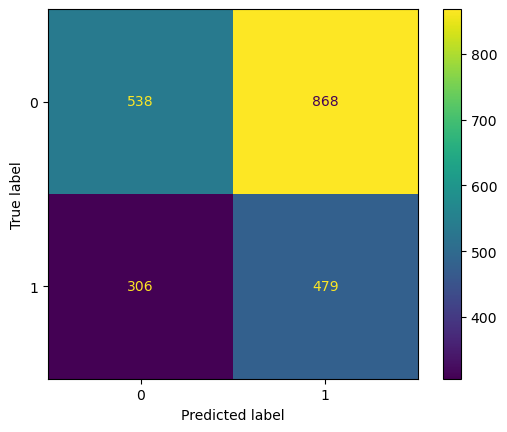

In [29]:
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [2, 1, 0.1],
    'max_depth': [4, 5, 6],
}

scoring = 'recall'

grid_searchGBM = GridSearchCV(gbm, param_grid, cv=3, refit=True, verbose=3, scoring=scoring)
grid_searchGBM.fit(X_train, y_train)
grid_predictionGBM = grid_searchGBM.predict(X_test)


print("Best estimator: ", grid_searchGBM.best_estimator_)


print(classification_report(y_test, grid_predictionGBM))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionGBM)
plt.show()